In [1]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import math
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
def calcola_NN50_v1(rr_list):
    NN50_v1_count=0
    for i in range(0,len(rr_list)-1): 
        if(abs(rr_list[i]-rr_list[i+1])-0.050>=0):
            NN50_v1_count+=1
    return NN50_v1_count

In [4]:
def calcola_NN50_v2(list):
    NN50_v2_count=0
    for i in range(1,len(list)):
        if(abs(list[i]-list[i-1])-0.050>=0):
            NN50_v2_count+=1
    return NN50_v2_count

In [5]:
def serial_corr(y1, lag=1):
    y2=np.roll(y1,lag)
    m=statistics.mean(y1)
    num=0
    denom=0
#    print(np.corrcoef(y1,y2)[0,1])
    for i in range(0,len(y1)):
        num+=(y1[i]-m)*(y2[i]-m)
        denom+=(y1[i]-m)**2
    return num/denom

In [6]:
def calcola_NEP(lista):
    sommatoria=0
    if(len(lista)<=2):
        return(np.nan)
    for i in range(1,len(lista)-1):
        var=(lista[i]-lista[i-1])*(lista[i+1]-lista[i])
        sommatoria+=(1-np.heaviside(var,0.5))
    return sommatoria/(len(lista)-2)

In [7]:
def ridimensionaDataSet(dfECG,dfAPNEA,dfQRS):
    
    maxTimeQRS=dfQRS['time'][len(dfQRS)-1]
    maxTimeECG=dfECG['time'][len(dfECG)-1]
    maxTimeAPN=dfAPNEA['time'][len(dfAPNEA)-1]+60
    if(maxTimeAPN<maxTimeECG and maxTimeAPN<maxTimeQRS):
        print('a')
        dfECG=dfECG[dfECG['time']<=(time_apn[len(time_apn)-1]+60)]
        dfQRS=dfQRS[dfQRS['time']<=(time_apn[len(time_apn)-1]+60)]
    elif(maxTimeECG<maxTimeAPN and maxTimeECG<maxTimeQRS):
        print('b')
        dfAPNEA=dfAPNEA[dfAPNEA['time']<=(time_ecg[len(time_ecg)-1])]
        dfQRS=dfQRS[dfQRS['time']<=(time_ecg[len(time_ecg)-1])]
    elif(maxTimeQRS<maxTimeAPN and maxTimeQRS<maxTimeECG):
        print('c')
        dfAPNEA=dfAPNEA[dfAPNEA['time']+60<=(time_qrs[len(time_qrs)-1])]
        dfECG=dfECG[dfECG['time']<=(time_qrs[len(time_qrs)-1])]



In [8]:
def creoRRIntervals():
    RR_intervals=[]
    for i in range (1,len(dfQRS)):
        RR_intervals.append(dfQRS['time'][i]-dfQRS['time'][i-1])
    RR_intervals.append(np.nan)
    dfQRS['rr']=RR_intervals
    
    rd_intervals=[]
    rd_intervals_2=[]
    for i in range(0,len(RR_intervals)-1):
        rd_intervals.append(RR_intervals[i+1]-RR_intervals[i])
    rd_intervals_2=np.power(rd_intervals,2)
    return RR_intervals,rd_intervals,rd_intervals_2

In [9]:
def divisioneIntervalli60():
    #divido in epoch di 60 s
    lunghezza_intervalli=60*Fs_ecg
    df=pd.DataFrame();

    startTime=[]
    stopTime=[]

    startRRIndex=[]
    stopRRIndex=[]

    numIntervalli=len(dfECG)/lunghezza_intervalli
    if(len(ecg)%lunghezza_intervalli!=0):
        numIntervalli+=1
    print(numIntervalli)
    for i in range(0,math.floor(numIntervalli)-1):
       # mediaECG.append((ecg[i*lunghezza_intervalli:i*lunghezza_intervalli+lunghezza_intervalli-1]).mean())
        startTime.append(dfECG['time'][i*lunghezza_intervalli])
        stopTime.append(dfECG['time'][i*lunghezza_intervalli+lunghezza_intervalli-1])
       # devECG.append(np.std(ecg[i*lunghezza_intervalli:i*lunghezza_intervalli+lunghezza_intervalli-1]))

    df['startTime']=startTime  
    df['stopTime']=stopTime  
    df['time_apn']=dfAPNEA['time']
    df['label']=dfAPNEA['apnea']
    #df_10['ECG_mean']=mediaECG  
    #df_10['devECG']=devECG  
    #return df_10

    k=0
    for i in range (0, len(df)):
            if(k<len(RR_intervals)):
                startRRIndex.append(k)
                k=k+1
                while( k<len(dfQRS) and df['stopTime'][i]>=dfQRS['time'][k] ):
                    k=k+1
                stopRRIndex.append(k-1)
                #print(k-1)
           # else:
              #  startRRIndex.append(np.nan)
               # stopRRIndex.append(np.nan)
    df['startRRIndex']=startRRIndex
    df['stopRRIndex']=stopRRIndex
    return df

In [10]:
def extractFeature_RR():
    
    label=[]
    for i in range(0,len(dfAPNEA)):
        if(dfAPNEA['apnea'][i]=='N'):
            label.append(0)
        else:
            label.append(1)
    df_features=pd.DataFrame()
    mediaRR=[]
    stdRR=[]
    NN50_v1=[]
    NN50_v2=[]
    pNN50_v1=[]
    pNN50_v2=[]
    durata=[]
    mean_rd=[]
    std_rd=[]
    RMSDD=[]
    serialCC_1=[]
    serialCC_2=[]
    serialCC_3=[]
    serialCC_4=[]
    serialCC_5=[]
    NEP=[]
    for i in range(0,len(df)):
        durata.append(df['stopRRIndex'][i]-df['startRRIndex'][i])
        mediaRR.append(statistics.mean(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]]))
        stdRR.append(statistics.stdev(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]]))
        NN50_v1.append(calcola_NN50_v1(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]]))
        NN50_v2.append(calcola_NN50_v2(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]]))
        pNN50_v1.append(NN50_v1[i]/durata[i])
        pNN50_v2.append(NN50_v2[i]/durata[i])
        mean_rd.append(statistics.mean(rd_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]]))
        std_rd.append(statistics.stdev(rd_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]]))
        RMSDD.append(math.sqrt(statistics.mean(rd_intervals_2[df['startRRIndex'][i]:df['stopRRIndex'][i]])))
        serialCC_1.append(serial_corr(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]],1))
        serialCC_2.append(serial_corr(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]],2))
        serialCC_3.append(serial_corr(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]],3))
        serialCC_4.append(serial_corr(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]],4))
        serialCC_5.append(serial_corr(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]],5))
        NEP.append(calcola_NEP(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]]))
    df_features['mediaRR']=mediaRR
    df_features['stdRR']=stdRR
    df_features['NN50_v1']=NN50_v1
    df_features['NN50_v2']=NN50_v2
    df_features['pNN50_v1']=pNN50_v1
    df_features['pNN50_v2']=pNN50_v2
    df_features['mean_rd']=mean_rd
    df_features['std_rd']=std_rd
    df_features['RMSDD']=RMSDD
    df_features['serialCC_1']=serialCC_1
    df_features['serialCC_2']=serialCC_2
    df_features['serialCC_3']=serialCC_3
    df_features['serialCC_4']=serialCC_4
    df_features['serialCC_5']=serialCC_5
    df_features['NEP']=NEP
    if(len(label)==len(df_features)+1):
        label = label[:-1]
    df_features['label']=label
    return df_features

In [11]:
fileName=['a01','a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20',
         'b01','b02','b03','b04','b05','c01','c02','c03','c04','c05','c06','c07','c08','c09','c10',
         'x01','x02','x03','x04','x05','x06','x07','x08','x09','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
mypath='C:/Users/sara/Documents/5anno/TESI/DataBase_PhysioNet/www.physionet.org/physiobank/database/apnea-ecg/'


In [12]:
# Valori ECG
df_features_list=[]
for index in range(0,34):
#index=0
    recordname=mypath+fileName[index]
    print(index)
    record = wfdb.rdsamp(recordname)
    dfECG=pd.DataFrame()
    ecg=record[0]
    Fs_ecg=record[1]['fs']
    intervallo=len(ecg)/(len(ecg)*Fs_ecg)
    time_ecg=[]
    for i in range(0,len(ecg)):
        time_ecg.append(intervallo*i)
    dfECG['time']=time_ecg
    dfECG['ecg']=ecg

    # valori label APNEA
    dfAPNEA=pd.DataFrame()
    ann = wfdb.rdann(recordname, extension="apn")
    time_apn=ann.sample/100
    apn=ann.symbol

    dfAPNEA['time']=time_apn
    dfAPNEA['apnea']=apn

    # valori QRS
    dfQRS=pd.DataFrame()
    ann = wfdb.rdann(recordname, extension="qrs")
    time_qrs=ann.sample/100
    dfQRS['time']=time_qrs


    #leggo RR da csv
    dfQRS = pd.read_pickle( mypath+'RR-EDR/'+fileName[index]+'QRS.pkl')
    RR_intervals=dfQRS['rr']

    #RIDIMENSIONO I DB

    maxTimeQRS=dfQRS['time'][len(dfQRS)-1]
    maxTimeECG=dfECG['time'][len(dfECG)-1]
    maxTimeAPN=dfAPNEA['time'][len(dfAPNEA)-1]
    if(maxTimeAPN<maxTimeECG and maxTimeAPN<maxTimeQRS):
        dfECG=dfECG[dfECG['time']<=(time_apn[len(time_apn)-1]+60)]
        dfQRS=dfQRS[dfQRS['time']<=(time_apn[len(time_apn)-1]+60)]
    elif(maxTimeECG<maxTimeAPN and maxTimeECG<maxTimeQRS):
        dfAPNEA=dfAPNEA[dfAPNEA['time']<=(time_ecg[len(time_ecg)-1])]
        dfQRS=dfQRS[dfQRS['time']<=(time_ecg[len(time_ecg)-1])]
    elif(maxTimeQRS<maxTimeAPN and maxTimeQRS<maxTimeECG):
        dfAPNEA=dfAPNEA[dfAPNEA['time']+60<=(time_qrs[len(time_qrs)-1])]
        dfECG=dfECG[dfECG['time']<=(time_qrs[len(time_qrs)-1])]

    #creo RR_intervals
    '''RR_intervals=[]
    for i in range (1,len(dfQRS)):
        RR_intervals.append(dfQRS['time'][i]-dfQRS['time'][i-1])
    RR_intervals.append(np.nan)
    dfQRS['rr']=RR_intervals'''



    #divido in epoch di 60 s
    lunghezza_intervalli=60*Fs_ecg
    df=pd.DataFrame();
    startTime=[]
    stopTime=[]
    startRRIndex=[]
    stopRRIndex=[]

    numIntervalli=len(dfECG)/lunghezza_intervalli
    if(len(ecg)%lunghezza_intervalli!=0):
        numIntervalli+=1
    print(numIntervalli)
    for i in range(0,math.floor(numIntervalli)-1):
       # mediaECG.append((ecg[i*lunghezza_intervalli:i*lunghezza_intervalli+lunghezza_intervalli-1]).mean())
        startTime.append(dfECG['time'][i*lunghezza_intervalli])
        stopTime.append(dfECG['time'][i*lunghezza_intervalli+lunghezza_intervalli-1])
       # devECG.append(np.std(ecg[i*lunghezza_intervalli:i*lunghezza_intervalli+lunghezza_intervalli-1]))

    df['startTime']=startTime  
    df['stopTime']=stopTime  
    df['time_apn']=dfAPNEA['time']
    df['label']=dfAPNEA['apnea']

    k=0
    for i in range (0, len(df)):
            if(k<len(RR_intervals)):
                startRRIndex.append(k)
                k=k+1
                while( k<len(dfQRS) and df['stopTime'][i]>=dfQRS['time'][k] ):
                    k=k+1
                stopRRIndex.append(k-1)
                #print(k-1)
           # else:
              #  startRRIndex.append(np.nan)
               # stopRRIndex.append(np.nan)
    df['startRRIndex']=startRRIndex
    df['stopRRIndex']=stopRRIndex



    # calcolo interbeat differentials rd[i]=rr[i+1]−rr[i]
    rd_intervals=[]
    rd_intervals_2=[]
    for i in range(0,len(RR_intervals)-1):
        rd_intervals.append(RR_intervals[i+1]-RR_intervals[i])
    rd_intervals_2=np.power(rd_intervals,2)

    #label
    label=[]
    for i in range(0,len(dfAPNEA)):
        if(dfAPNEA['apnea'][i]=='N'):
            label.append(0)
        else:
            label.append(1)


    #CALCOLO LE FEATURES
    df_features=pd.DataFrame()
    mediaRR=[]
    stdRR=[]
    NN50_v1=[]
    NN50_v2=[]
    pNN50_v1=[]
    pNN50_v2=[]
    durata=[]
    mean_rd=[]
    std_rd=[]
    RMSDD=[]
    serialCC_1=[]
    serialCC_2=[]
    serialCC_3=[]
    serialCC_4=[]
    serialCC_5=[]
    NEP=[]
    iqr=[]
    db=[]
    ffts=[]
    for i in range(0,len(df)):
        durata.append(df['stopRRIndex'][i]-df['startRRIndex'][i])
        if(durata[i]<2):
            mediaRR.append(np.nan)
            stdRR.append(np.nan)
            NN50_v1.append(np.nan)
            NN50_v2.append(np.nan)
            pNN50_v1.append(np.nan)
            pNN50_v2.append(np.nan)
            mean_rd.append(np.nan)
            std_rd.append(np.nan)
            RMSDD.append(np.nan)
            serialCC_1.append(np.nan)
            serialCC_2.append(np.nan)
            serialCC_3.append(np.nan)
            serialCC_4.append(np.nan)
            serialCC_5.append(np.nan)
            NEP.append(np.nan)
            iqr.append(np.nan)
            ffts.append(np.nan)

        else:
            intervalloRR=np.array(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]])
            mediaRR.append(statistics.mean(intervalloRR))
            stdRR.append(statistics.stdev(intervalloRR))
            NN50_v1.append(calcola_NN50_v1(intervalloRR))
            NN50_v2.append(calcola_NN50_v2(intervalloRR))
            pNN50_v1.append(NN50_v1[i]/durata[i])
            pNN50_v2.append(NN50_v2[i]/durata[i])
            mean_rd.append(statistics.mean(rd_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]]))
            std_rd.append(statistics.stdev(rd_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]]))
            RMSDD.append(math.sqrt(statistics.mean(rd_intervals_2[df['startRRIndex'][i]:df['stopRRIndex'][i]])))
            serialCC_1.append(serial_corr(intervalloRR,1))
            serialCC_2.append(serial_corr(intervalloRR,2))
            serialCC_3.append(serial_corr(intervalloRR,3))
            serialCC_4.append(serial_corr(intervalloRR,4))
            serialCC_5.append(serial_corr(intervalloRR,5))
            NEP.append(calcola_NEP(intervalloRR))
            q75, q25 = np.percentile(intervalloRR, [75 ,25])
            iqr.append(q75 - q25)
            ffts.append(fft(intervalloRR))

        db.append(index)

    df_features['db']=db
    df_features['mediaRR']=mediaRR
    df_features['stdRR']=stdRR
    df_features['NN50_v1']=NN50_v1
    df_features['NN50_v2']=NN50_v2
    df_features['pNN50_v1']=pNN50_v1
    df_features['pNN50_v2']=pNN50_v2
    df_features['mean_rd']=mean_rd
    df_features['std_rd']=std_rd
    df_features['RMSDD']=RMSDD
    df_features['serialCC_1']=serialCC_1
    df_features['serialCC_2']=serialCC_2
    df_features['serialCC_3']=serialCC_3
    df_features['serialCC_4']=serialCC_4
    df_features['serialCC_5']=serialCC_5
    df_features['NEP']=NEP
    df_features['fft']=ffts
    if(len(label)==len(NEP)+1):
        label=label[:-1]
    df_features['label']=label

    df_features=df_features.dropna() 
    df_features_list.append(df_features)

0
490.00016666666664
1
529.0001666666667
2
520.0001666666667
3
493.00016666666664
4
454.25
5
510.6666666666667
6
511.0833333333333
7
501.4166666666667
8
495.00016666666664
9
517.9166666666666
10
466.00016666666664
11
577.0
12
495.25
13
510.00016666666664
14
510.3333333333333
15
482.3333333333333
16
485.0833333333333
17
490.00016666666664
18
502.0
19
510.0
20
487.1666666666667
21
518.0001666666667
22
441.5
23
429.8333333333333
24
433.25
25
484.1666666666667
26
502.1666666666667
27
454.3333333333333
28
482.1666666666667
29
466.5
30
468.3333333333333
31
429.1666666666667
32
513.0001666666667
33
468.5


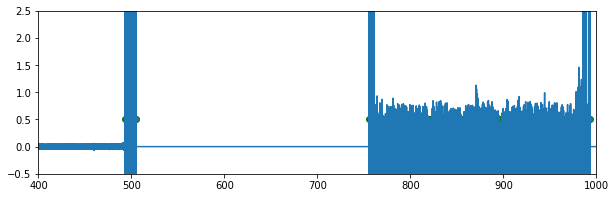

In [20]:
plt.figure(figsize=(10,3))
plt.axis([400,1000,-0.5,2.5])
plt.plot(time_ecg,ecg)
#y_plot=[1 for i in range(0,len(dfRR))]
#plt.scatter(dfRR['time'],y_plot,edgecolors='g')
y_plot=[0.5 for i in range(0,len(dfQRS))]
plt.scatter(dfQRS['time'],y_plot,edgecolors='g')

In [14]:
#import matplotlib.pyplot
#matplotlib.pyplot.psd(RR_intervals[df['startRRIndex'][120]:df['stopRRIndex'][120]], NFFT=256, Fs=0.5, Fc=0)

In [15]:
NN50_v1.append(calcola_NN50_v1(np.array(RR_intervals[df['startRRIndex'][2]:df['stopRRIndex'][2]])))
#np.array(RR_intervals[df['startRRIndex'][1]:df['stopRRIndex'][1]])

In [95]:
df_tot=pd.DataFrame()
for i in range(0,len(df_features_list)):
    df_tot=df_tot.append(df_features_list[i],ignore_index=True)

In [89]:
df_tot=df_tot.dropna() 

In [97]:
len(df_tot)

16536

In [ ]:
'''f, axarr = plt.subplots(2, sharex=True,figsize=(10,8))
axarr[0].axis([20,30,-3,3])
axarr[0].plot(time_ecg,ecg, marker='o',markersize=2, color="gray")
#y=[2 for i in range(0,len(dfQRS))]
for i in range(20,50):
    axarr[0].plot(time_qrs[i],2,marker='*',color='red')
axarr[1].step(time_apn,apn)'''

## Time Domain Feature RR

In [21]:
df_tot.columns

Index(['db', 'mediaRR', 'stdRR', 'NN50_v1', 'NN50_v2', 'pNN50_v1', 'pNN50_v2',
       'mean_rd', 'std_rd', 'RMSDD', 'serialCC_1', 'serialCC_2', 'serialCC_3',
       'serialCC_4', 'serialCC_5', 'NEP', 'fft', 'label'],
      dtype='object')

In [98]:
df_10_normalized=pd.DataFrame()
df_10_normalized['db']=df_tot['db']
df_10_normalized['mediaRR']=preprocessing.normalize([np.array(df_tot['mediaRR'])])[0]
df_10_normalized['stdRR']=preprocessing.normalize([np.array(df_tot['stdRR'])])[0]
df_10_normalized['NN50_v1']=preprocessing.normalize([np.array(df_tot['NN50_v1'])])[0]
df_10_normalized['NN50_v2']=preprocessing.normalize([np.array(df_tot['NN50_v2'])])[0]
df_10_normalized['pNN50_v1']=preprocessing.normalize([np.array(df_tot['pNN50_v1'])])[0]
df_10_normalized['pNN50_v2']=preprocessing.normalize([np.array(df_tot['pNN50_v2'])])[0]
df_10_normalized['mean_rd']=preprocessing.normalize([np.array(df_tot['mean_rd'])])[0]
df_10_normalized['std_rd']=preprocessing.normalize([np.array(df_tot['std_rd'])])[0]
df_10_normalized['RMSDD']=preprocessing.normalize([np.array(df_tot['RMSDD'])])[0]
df_10_normalized['serialCC_1']=preprocessing.normalize([np.array(df_tot['serialCC_1'])])[0]
df_10_normalized['serialCC_2']=preprocessing.normalize([np.array(df_tot['serialCC_2'])])[0]
df_10_normalized['serialCC_3']=preprocessing.normalize([np.array(df_tot['serialCC_3'])])[0]
df_10_normalized['serialCC_4']=preprocessing.normalize([np.array(df_tot['serialCC_4'])])[0]
df_10_normalized['serialCC_5']=preprocessing.normalize([np.array(df_tot['serialCC_5'])])[0]
df_10_normalized['NEP']=preprocessing.normalize([np.array(df_tot['NEP'])])[0]
df_10_normalized['label']=np.array(df_tot['label'])

In [118]:
df_a=df_10_normalized.loc[(df_10_normalized['db'] >=0) & (df_10_normalized['db'] <=19)]
df_b=df_10_normalized.loc[(df_10_normalized['db'] >=20) & (df_10_normalized['db'] <=24)]
df_c=df_10_normalized.loc[(df_10_normalized['db'] >=25) & (df_10_normalized['db'] <=34)]

In [119]:
len(df_a)+len(df_b)+len(df_c)
len(df_10_normalized)

import random
from numpy.random import permutation

# Randomly shuffle the index of nba.
random_indices = permutation(df_a.index)
# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(df_a)*0.3)
# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = df_a.loc[random_indices[1:test_cutoff]]
# Generate the train set with YYYYYthe rest of the data.
train = df_a.loc[random_indices[test_cutoff:]]

In [100]:
import random
from numpy.random import permutation

# Randomly shuffle the index of nba.
random_indices = permutation(df_10_normalized.index)
# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(df_10_normalized)*0.3)
# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = df_10_normalized.loc[random_indices[1:test_cutoff]]
# Generate the train set with YYYYYthe rest of the data.
train = df_10_normalized.loc[random_indices[test_cutoff:]]

#train,test= train_test_split(df_a, test_size=0.3, random_state=42)

11576

In [71]:
df_10_normalized.columns


Index(['db', 'mediaRR', 'stdRR', 'NN50_v1', 'NN50_v2', 'pNN50_v1', 'pNN50_v2',
       'mean_rd', 'std_rd', 'RMSDD', 'serialCC_1', 'serialCC_2', 'serialCC_3',
       'serialCC_4', 'serialCC_5', 'NEP', 'label'],
      dtype='object')

In [105]:
x_columns = ['mediaRR', 'stdRR', 'NN50_v1', 'NN50_v2', 'pNN50_v1', 'pNN50_v2',
       'mean_rd', 'std_rd','RMSDD', 'serialCC_1', 'serialCC_2', 'serialCC_3',
       'serialCC_4', 'serialCC_5', 'NEP']
y_column = ['label']

In [120]:
from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=1)
# Fit the model on the training data.
classifier=knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

y_pred = classifier.fit(train[x_columns], train[y_column]).predict(test[x_columns])
for i in range(0,len(y_pred)):
    y_pred[i]=math.floor(y_pred[i])

In [121]:
cnf_matrix = confusion_matrix(test[y_column]['label'], y_pred)

Confusion matrix, without normalization
[[ 719  448]
 [ 393 1446]]


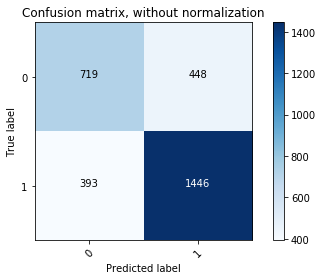

In [122]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix, without normalization')

In [123]:
accu=(cnf_matrix[0][0]+cnf_matrix[1][1])/(cnf_matrix[0][0]+cnf_matrix[1][1]+cnf_matrix[1][0]+cnf_matrix[0][1])
accu

0.7202262142381903

Normalized confusion matrix
[[0.61610968 0.38389032]
 [0.2137031  0.7862969 ]]


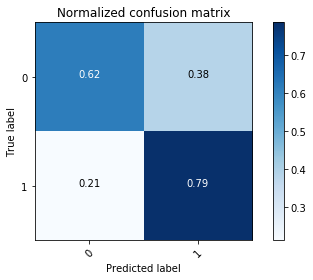

In [124]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True,
                      title='Normalized confusion matrix')

In [117]:
from sklearn.metrics import classification_report
print(classification_report(test[y_column], y_pred))  

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     22325
          1       1.00      1.00      1.00     36319

avg / total       1.00      1.00      1.00     58644



In [53]:
len(df_10_normalized)

16536